In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('MLR_car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [5]:
df.shape

(301, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [9]:
df_required = df.drop('Car_Name',axis=1)

# Data Processing

In [10]:
df_required['Present_Year'] = 2020
df_required.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Present_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [11]:
df_required['Age_Year']=df_required['Present_Year']-df_required['Year']
df_required.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Present_Year,Age_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [12]:
df_required=pd.get_dummies(df_required, drop_first= True)
df_required.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Present_Year,Age_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,2020,6,0,1,0,1
1,2013,4.75,9.54,43000,0,2020,7,1,0,0,1
2,2017,7.25,9.85,6900,0,2020,3,0,1,0,1
3,2011,2.85,4.15,5200,0,2020,9,0,1,0,1
4,2014,4.60,6.87,42450,0,2020,6,1,0,0,1


In [13]:
df_required_x = df_required.drop('Selling_Price',axis=1)
df_required_x.head()

,Year,Present_Price,Kms_Driven,Owner,Present_Year,Age_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,5.59,27000,0,2020,6,0,1,0,1
1,2013,9.54,43000,0,2020,7,1,0,0,1
2,2017,9.85,6900,0,2020,3,0,1,0,1
3,2011,4.15,5200,0,2020,9,0,1,0,1
4,2014,6.87,42450,0,2020,6,1,0,0,1


In [14]:
import matplotlib.pyplot as plt

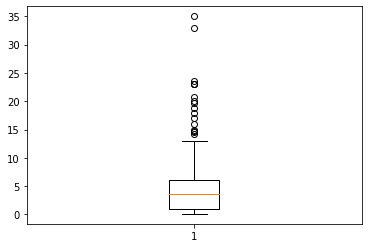

In [15]:
plt.boxplot(df_required['Selling_Price'])
plt.show()

C:\anaconda python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Selling_Price'>

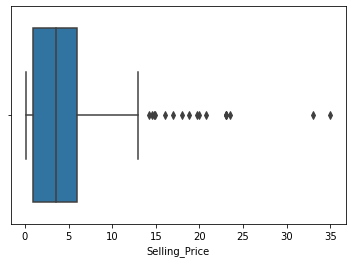

In [16]:
sns.boxplot(df_required['Selling_Price'])


# multi collinearity?
y = f(x1,x2,x3,x4.....)

y = mileage,  
mileage = f(cc,TyrePressure,FuelType,DrivingSkills,Speed)

cc and TyrePressure should not be correlated
FuelType and DrivingSkills should not be correlated
cc and FuelType should not be correlated
if these variables are correlated  the end results may get affected and creates overfitting. 

<AxesSubplot:>

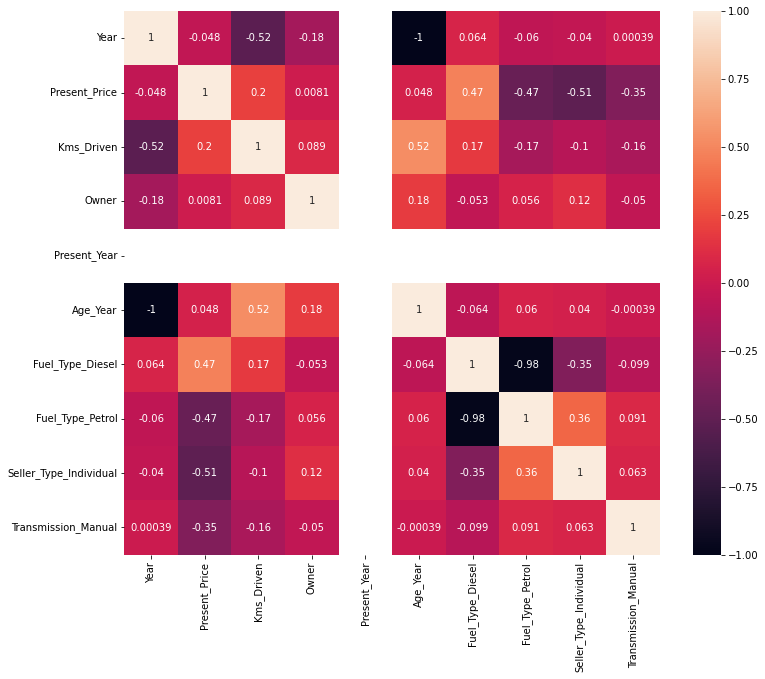

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(df_required_x.corr(), annot=True) #checking multicollinearity

# setup the dependent & the Independent variable

In [18]:
x=df_required_x
y=df_required.iloc[:,1]

In [19]:
x

,Year,Present_Price,Kms_Driven,Owner,Present_Year,Age_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,5.59,27000,0,2020,6,0,1,0,1
1,2013,9.54,43000,0,2020,7,1,0,0,1
2,2017,9.85,6900,0,2020,3,0,1,0,1
3,2011,4.15,5200,0,2020,9,0,1,0,1
4,2014,6.87,42450,0,2020,6,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
296,2016,11.60,33988,0,2020,4,1,0,0,1
297,2015,5.90,60000,0,2020,5,0,1,0,1
298,2009,11.00,87934,0,2020,11,0,1,0,1
299,2017,12.50,9000,0,2020,3,1,0,0,1


In [20]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2 , random_state=0)

In [22]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [23]:
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['predicted'])
y_pred

,predicted
0,7.517500
1,-0.381360
2,4.255947
3,9.007192
4,14.426934
...,...
56,0.306821
57,1.983211
58,3.375038
59,0.879015


# Evaluate the algorithm

In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [25]:
r2 = r2_score(y_test,y_pred)
print('r2_score',r2)
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))


r2_score 0.9144342972228415
MAE 0.9937753386730539
MSE 2.162871527787854


In [26]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.4706704347976314